In [ ]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import pathlib

import PIL


12584


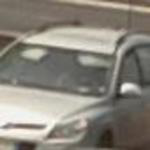

In [ ]:
from zipfile import ZipFile
# file_name = 'A.zip'
file_name = 'AB.zip'

# from google.collab import files
# upload = files.upload()

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  
park_dir = os.path.join(os.path.dirname("park_photos"), 'AB')
data_dir = pathlib.Path(park_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

free = list(data_dir.glob('busy/*'))
PIL.Image.open(str(free[2]))

# park_dir = os.path.join(os.path.dirname(park_folder), "lot_photos")         
# park_dir

# from google.colab import files
# uploaded = files.upload()

In [ ]:

IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    park_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
    subset='training',
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    park_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE),
    subset='validation',
    class_mode='binary'
) 

Found 10068 images belonging to 2 classes.
Found 2516 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


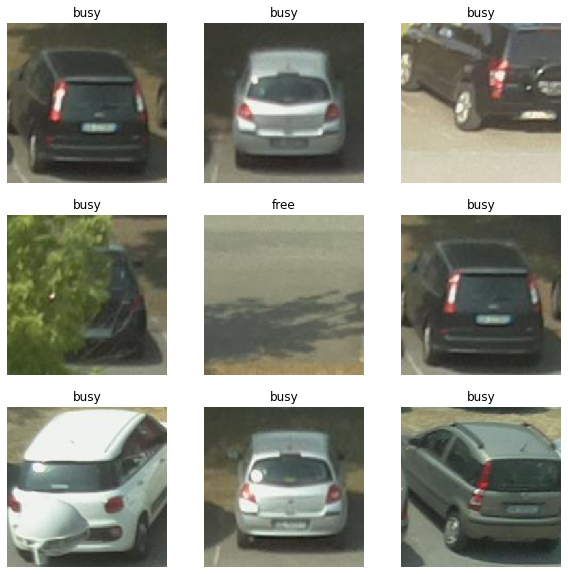

In [ ]:
image_batch, label_batch = next(val_generator)
image_batch.shape, label_batch.shape

class_names = sorted(train_generator.class_indices.keys())
# print(label_batch)

plt.figure(figsize=(10, 10))
for images in image_batch:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[label_batch[i].astype("uint8")])
    plt.axis("off")

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('lot_labels.txt', 'w') as f:
  f.write(labels)

{'busy': 0, 'free': 1}


In [ ]:
!cat lot_labels.txt

busy
free

In [ ]:
IMG_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights="imagenet")

base_model.trainable=False
 

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.BinaryAccuracy()])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable weights = {}'.format(len(model.trainable_weights)))

Number of trainable weights = 2


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator),
                    epochs=15,
                    validation_data = val_generator,
                    validation_steps=len(val_generator)
)

Epoch 1/15
158/158 [==============================] - 67s 210ms/step - loss: 0.2342 - binary_accuracy: 0.8935 - val_loss: 0.0679 - val_binary_accuracy: 0.9813
Epoch 2/15
158/158 [==============================] - 32s 202ms/step - loss: 0.1124 - binary_accuracy: 0.9550 - val_loss: 0.0617 - val_binary_accuracy: 0.9829
Epoch 3/15
158/158 [==============================] - 32s 201ms/step - loss: 0.0913 - binary_accuracy: 0.9647 - val_loss: 0.0482 - val_binary_accuracy: 0.9881
Epoch 4/15
158/158 [==============================] - 32s 202ms/step - loss: 0.0811 - binary_accuracy: 0.9694 - val_loss: 0.0446 - val_binary_accuracy: 0.9889
Epoch 5/15
158/158 [==============================] - 32s 201ms/step - loss: 0.0730 - binary_accuracy: 0.9710 - val_loss: 0.0437 - val_binary_accuracy: 0.9897
Epoch 6/15
158/158 [==============================] - 32s 202ms/step - loss: 0.0682 - binary_accuracy: 0.9743 - val_loss: 0.0376 - val_binary_accuracy: 0.9917
Epoch 7/15
158/158 [==========================

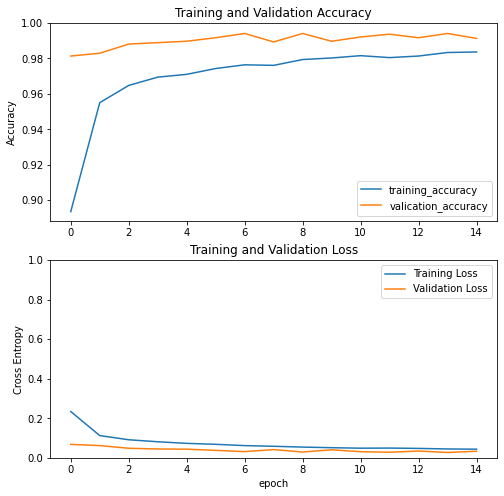

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2,1,1)
plt.plot(acc, label='training_accuracy')
plt.plot(val_acc, label='valication_accuracy')
plt.legend(loc="lower right")
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2,1,2)
plt.plot(loss,label='Training Loss')
plt.plot(val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



#Working Prediction

In [ ]:
image = tf.keras.preprocessing.image.load_img('20150703_0825_43.jpg',target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image,data_format='channels_last')
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
print(predictions.item(0))

class_labels = sorted(train_generator.class_indices.keys())
print(
    "This image most likely belongs to {}"
    .format(class_labels[predictions.item(0)>0])
)
plt.imshow(image)
plt.axis(False)

# Fine Tuning


In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  154


In [ ]:
base_model.trainable = True
fine_tune_at = 85

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
model.evaluate(train_generator)

158/158 [==============================] - 26s 161ms/step - loss: 0.0323 - binary_accuracy: 0.9915


[0.03234860673546791, 0.9914580583572388]

In [ ]:
model.evaluate(val_generator)

40/40 [==============================] - 6s 159ms/step - loss: 0.0331 - binary_accuracy: 0.9913


[0.033068954944610596, 0.9912559390068054]

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Compilation

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('modified_mobilenet.tflite','wb') as f:
  f.write(tflite_model)

In [ ]:
# A generator that provides a representative dataset
def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(park_dir + '/*/*')
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

with open('mobilenet_v2_1.0_224_quant.tflite', 'wb') as f:
  f.write(tflite_model)



In [ ]:
batch_images, batch_labels = next(val_generator)

logits = model(batch_images)
prediction = np.where(logits>0, 1, 0)
# print(prediction)
print()

keras_accuracy = tf.keras.metrics.Accuracy()
keras_accuracy(prediction, batch_labels)

print("Raw model accuracy: {:.3%}".format(keras_accuracy.result()))

In [ ]:
def set_input_tensor(interpreter, input):
  input_details = interpreter.get_input_details()[0]
  tensor_index = input_details['index']
  input_tensor = interpreter.tensor(tensor_index)()[0]
  # Inputs for the TFLite model must be uint8, so we quantize our input data.
  # NOTE: This step is necessary only because we're receiving input data from
  # ImageDataGenerator, which rescaled all image data to float [0,1]. When using
  # bitmap inputs, they're already uint8 [0,255] so this can be replaced with:
  #   input_tensor[:, :] = input
  scale, zero_point = input_details['quantization']
  input_tensor[:, :] = np.uint8(input / scale + zero_point)

def classify_image(interpreter, input):
  set_input_tensor(interpreter, input)
  interpreter.invoke()
  # tflite_results = tf_lite_interpreter.get_tensor(output_details['index'])
  output_details = interpreter.get_output_details()[0]
  # print(output_details)
  output = interpreter.get_tensor(output_details['index'])
  # print(output)
  # Outputs from the TFLite model are uint8, so we dequantize the results:
  scale, zero_point = output_details['quantization']
  # print(scale,zero_point, output)
  output = scale * (output - zero_point)
  # print(output)
  top_1 = np.where(output>11,0,1)
  # top_1 = output.argmax()
  return output

interpreter = tf.lite.Interpreter('mobilenet_v2_1.0_224_quant.tflite')
interpreter.allocate_tensors()

# Collect all inference predictions in a list
batch_prediction = []
batch_truth = batch_labels

for i in range(len(batch_images)):
  prediction = classify_image(interpreter, batch_images[i])
  # print(prediction, batch_truth[i])
  batch_prediction.append(prediction)

print(np.array(batch_prediction).flatten())

# print(batch_)

# Compare all predictions to the ground truth
tflite_accuracy = tf.keras.metrics.Accuracy()
tflite_accuracy(np.array(batch_prediction).flatten(), batch_truth)
print("Quant TF Lite accuracy: {:.3%}".format(tflite_accuracy.result()))


In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

In [ ]:
! edgetpu_compiler mobilenet_v2_1.0_224_quant.tflite

# Download the Model

In [ ]:
from google.colab import files

files.download('mobilenet_v2_1.0_224_quant_edgetpu.tflite')
files.download('lot_labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>